## Classes for Pikachu and Pichu

In [182]:
from numbers import Number

class Pikachu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pikachu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
            
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width

class Pichu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
class Entity:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
    
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    

## Cleaning method


In [183]:
import re                           #regular expression
"""def clean(stats_path):
    
    with open(stats_path, "r") as file:
        raw_stats = file.read()

    entity_stats = [line.strip() for line in raw_stats.split("\n")]
    entity_stats = [re.sub(r"[, ]", ",", line) for line in entity_stats]
    entity_stats = [re.sub(r"[ ]{1:}", "", line) for line in entity_stats]
    print(entity_stats)
    if not re.search(r"\((\d+, \d+)\)", entity_stats[0]):
        entity_stats = entity_stats[1:]                         #Taking away the first row (description) from list
    
    for line in entity_stats:
        if line == "":
            line.pop()
    
    _tuple = [eval(item) for item in entity_stats]          #using eval to take every object/row and transforming it to tuple (cordinates)
                                                                #Eval tip from teacher, further information about eval from GPT
    _width, _height = zip(*_tuple)                              #opening up tuple and transfering it over to a x, y variable
    
    return _width, _height"""

'def clean(stats_path):\n    \n    with open(stats_path, "r") as file:\n        raw_stats = file.read()\n\n    entity_stats = [line.strip() for line in raw_stats.split("\n")]\n    entity_stats = [re.sub(r"[, ]", ",", line) for line in entity_stats]\n    entity_stats = [re.sub(r"[ ]{1:}", "", line) for line in entity_stats]\n    print(entity_stats)\n    if not re.search(r"\\((\\d+, \\d+)\\)", entity_stats[0]):\n        entity_stats = entity_stats[1:]                         #Taking away the first row (description) from list\n    \n    for line in entity_stats:\n        if line == "":\n            line.pop()\n    \n    _tuple = [eval(item) for item in entity_stats]          #using eval to take every object/row and transforming it to tuple (cordinates)\n                                                                #Eval tip from teacher, further information about eval from GPT\n    _width, _height = zip(*_tuple)                              #opening up tuple and transfering it over to a

In [198]:
import re
import numpy as np
def clean_data(stats_path, from_file):
    if from_file:
        with open(stats_path, "r") as file:
            raw_stats = file.read()
    else:
        raw_stats = stats_path
    
    nospace_dimentions = re.sub(r"[ ]{1,}", "", raw_stats)
    dimentions = re.sub(r"[\n]", ",", nospace_dimentions)
    
    dimentions = dimentions.split("),(")
    dimentions =  [x.strip("()") for x in dimentions]
    
    pattern = re.compile(r"^-?\d+(\.\d+)?,-?\d+(\.\d+)?$")
    clean_dimensions = [x for x in dimentions if pattern.match(x)]
    
    cordinates = [eval(cordinate) for cordinate in clean_dimensions]
    _width, _height = zip(*cordinates)
    width = np.mean(_width)
    height = np.mean(_height)
    return width, height

## Read in existing data

In [185]:
stats_path_pikachu = "../data/pikachu.txt"

stats_path_pichu = "../data/pichu.txt"

## User Interface

In [199]:
def ui_console():
    import numpy as np
    
    from_file = False
    entity_width = float(input("Enter width of entity: "))
    entity_height = float(input("Enter height of entity: "))
    entity_dimensions = (f"({entity_width}, {entity_height})")
    entity_width, entity_height = clean_data(entity_dimensions, from_file)
    
    from_file = True
    width_mean_pikachu, height_mean_pikachu = clean_data(stats_path_pikachu, from_file)
    width_mean_pichu, height_mean_pichu = clean_data(stats_path_pichu, from_file)
        
    entity_distance_pikachu = np.sqrt((width_mean_pikachu - entity_width)**2 + (height_mean_pikachu - entity_height)**2) 
    entity_distance_pichu = np.sqrt((width_mean_pichu - entity_width)**2 + (height_mean_pichu - entity_height)**2)

    if entity_distance_pikachu < entity_distance_pichu:
        print(f"You most likly found a Pikachu!")
        entity = Entity(entity_width, entity_height)

    elif entity_distance_pichu < entity_distance_pikachu:
        print(f"You most likly found a Pichu!")
        entity = Entity(entity_width, entity_height)

    else:
        print(F"I am unshore if you found a Pikachu or Pichu...")
    
    return entity.width, entity.height

In [188]:
from_file = True
stats_path = "../data/pikachu.txt" 
pikachu_width, pikachu_height = clean_data(stats_path, from_file)

stats_path = "../data/pichu.txt"
pichu_width, pichu_height = clean_data(stats_path, from_file)

stats_path = "../Data/test_points.txt"
test_width, test_height = clean_data(stats_path, from_file)

"""print(f"Pikachu width: {pikachu_width}\nPikachu height: {pikachu_height}\nPichu width: {pichu_width}\nPikachu height: {pichu_height}")
print(f"Test punkter width: {test_width}\nTest punkter height: {test_height}")"""

'print(f"Pikachu width: {pikachu_width}\nPikachu height: {pikachu_height}\nPichu width: {pichu_width}\nPikachu height: {pichu_height}")\nprint(f"Test punkter width: {test_width}\nTest punkter height: {test_height}")'

## Plott method

You most likly found a Pikachu!


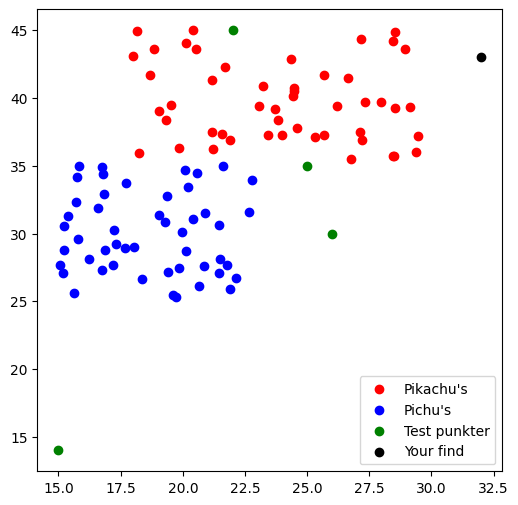

In [200]:
import matplotlib.pyplot as plt

entity_width, entity_height = ui_console()

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "red", label = "Pikachu's")
plt.scatter(pichu_width, pichu_height, color = "blue", label = "Pichu's")
plt.scatter(test_width, test_height, color = "green", label = "Test punkter")
plt.scatter(entity_width, entity_height, color = "black", label = "Your find")
plt.legend(loc = "lower right")

## Fetching file and cleaning the data

In [ ]:
#Pikachu
stats_path = "../data/pikachu.txt"                      #fetching file Data for Pikachu

with open(stats_path, "r") as file:
    raw_pikachu = file.read()                       

pikachu_stats = raw_pikachu.split("\n")                 #Splitting string by every row and making list
pikachu_stats = pikachu_stats[1:]                       #Taking away the first row (description) from list

if pikachu_stats[-1] == "":                             #can be good incase the last row is empty, which it was
    pikachu_stats.pop()                                 #deletes last row if it is empty, help from GPT

pikachu_tuple = [eval(item) for item in pikachu_stats]  #using eval to take every object/row and transforming it to tuple (cordinates)
                                                        #Eval tip from teacher, further information about eval from GPT
pikachu_width, pikachu_height = zip(*pikachu_tuple)     #opening up tuple and transfering it over to a x, y variable


#Pichu
stats_path = "../data/pichu.txt"                        #doing the same for Pichu

with open(stats_path, "r") as file:
    raw_pichu = file.read()

pichu_stats = raw_pichu.split("\n")
pichu_stats = pichu_stats[1:]

if pichu_stats[-1] == "":
    pichu_stats.pop()

pichu_tuple = [eval(item) for item in pichu_stats]
pichu_width, pichu_height = zip(*pichu_tuple)


#test punkter
stats_path = "../Data/test_points.txt"
with open(stats_path, "r") as file:
    testpunkter_raw = file.read()

testpunkter = testpunkter_raw.replace(", ", ",")            #tar bort oregelbunda mellanrum
testpunkter = testpunkter.replace("),(", "), (")            #Makes space inbetween every cordinate
test_list = testpunkter.split(", ")                         #Making list splitting every ", "


test_tuple = [eval(item) for item in test_list]             #tuple
test_width, test_height = zip(*test_tuple)                  

print(test_width, test_height)

(25, 15, 26, 22) (35, 14, 30, 45)


## Plotting Pikachu, pichu and test

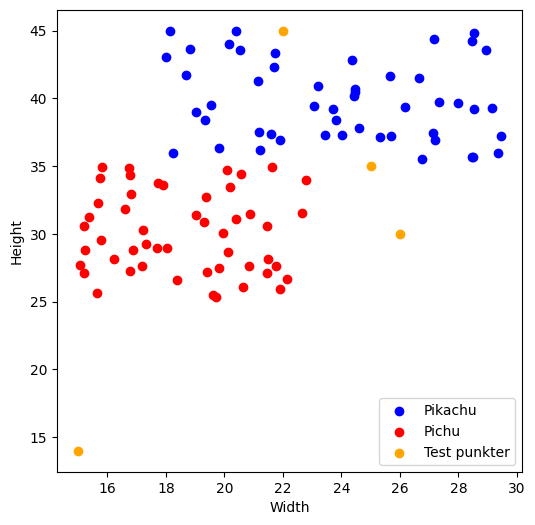

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "blue", label = "Pikachu")   #print for pinchu graf
plt.scatter(pichu_width, pichu_height, color = "red", label = "Pichu")          #print for pichu graf
plt.scatter(test_width, test_height, color = "orange", label = "Test punkter")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")

## Pikachu and Pichu mean dimensions

In [ ]:
"""Ide to calculate which one is closer from GPT"""

##Pikachu
width_sum_pikachu = 0
height_sum_pikachu = 0
i = 0

for width, height in pikachu_tuple:                 #Sum of dimensions
    width_sum_pikachu += width             
    height_sum_pikachu += height
    i += 1
    
width_mean_pikachu = width_sum_pikachu / i          #Mean calculation for pikachu
height_mean_pikachu = height_sum_pikachu / i

##Pichu
width_sum_pichu = 0
height_sum_pichu = 0
i = 0

for width, height in pichu_tuple:
    width_sum_pichu += width
    height_sum_pichu += height
    i += 1
    
width_mean_pichu = width_sum_pichu / i
height_mean_pichu = height_sum_pichu / i


print(f"Pikachu mean width: {width_mean_pikachu}\nPikachu mean height: {height_mean_pikachu}")
print(f"Pichu mean width: {width_mean_pichu}\nPichu mean height: {height_mean_pichu}")

Pikachu mean width: 23.945665818409296
Pikachu mean height: 39.82285079667779
Pichu mean width: 18.60547397404892
Pichu mean height: 30.084542394967194


## Adding unidentified

In [ ]:
import numpy as np

unidentified_width, unidentified_height = (24, 37)

#Formula to count distance from GPT even though i did it it exercises...
unidentified_distance_pikachu = np.sqrt((width_mean_pikachu - unidentified_width)**2 + (height_mean_pikachu - unidentified_height)**2) 
unidentified_distance_pichu = np.sqrt((width_mean_pichu - unidentified_width)**2 + (height_mean_pichu - unidentified_height)**2)

if unidentified_distance_pikachu < unidentified_distance_pichu:             #If Pikachu distance is smaler then Pichu's
    print(f"You most likly found a Pikachu!")

elif unidentified_distance_pichu < unidentified_distance_pikachu:           #If Pichu distance is smaler then Pikachu's
    print(f"You most likly found a Pichu!")

else:
    print(F"I am unshore if you found a Pikachu or Pichu...")               #If the distance are the same

You most likly found a Pikachu!


## User interface

IndentationError: expected an indented block after function definition on line 1 (3718140866.py, line 6)

## Plotting entity find

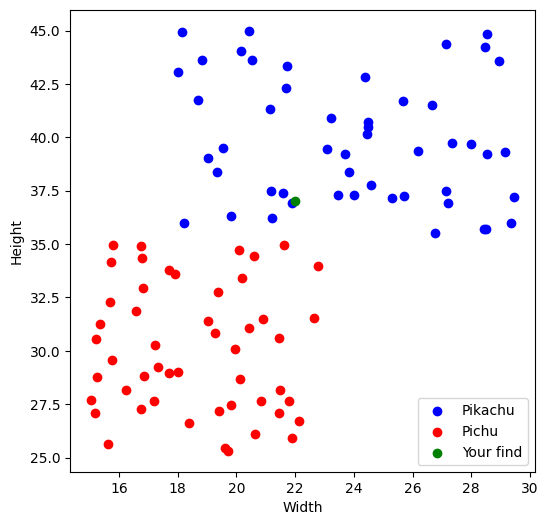

In [ ]:
import matplotlib.pyplot as plt
"""Help from exercises"""   ## kanske en en if(om det var pkachu eller pichu så går den över till rätt objekt)
                            ## En egen metod som jag slänger in i plotting metoden
plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "blue", label = "Pikachu")   #print for pinchu graf
plt.scatter(pichu_width, pichu_height, color = "red", label = "Pichu")          #print for pichu graf
plt.scatter(entity.width, entity.height, color = "green", label = "Your find")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")